In [2]:
import pyodide_kernel
pyodide_kernel.__version__

# L-System Renderer

## Notes
- Page/figure references in code, below, are from [*The Algorithmic Beauty of Plants*](https://archive.org/details/the-algorithmic-beauty-of-plants) by Przemyslaw Prusinkiewicz and Aristid Lindenmayer.
- To just muck about with the output, collapse all code cells (click grey/blue bar on far left of each cell), except the cell that begins "# Uncomment ONE of the following lines to run that Curve".
- I can recommend limiting your curve depth to less-than "6" in most instances so as to limit the computation time and the size of the SVG path output.

## License
- This work is licensed under the Creative Commons Attribution-ShareAlike 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-sa/4.0/.
- Title of work: L-System Renderer
- Attribute work to name: Chris Molloy
- Attribute work to URL: https://chrismolloy.com/p228.php
- Format of work: Jupyter Notebook (application/vnd.jupyter)

In [3]:
from IPython.display import SVG
import math
import re

C_OUTPUT = '/FILE/PATH/HERE.svg' # and uncomment final 3 lines of the last code cell
C_LENGTH = 10 # length of line segemnts, mm

In [4]:
class Curve:
  def __init__(_self, _initiator:str, _generators:dict, _turn_angle:float=math.pi/2, _edge_replacement:bool=True):
    _self.initiator = _initiator
    _self.generators = _generators
    _self.turn_angle = _turn_angle # radians
    _self.edge_replacement = _edge_replacement # all uppercase instructions become 'F' (c.f. node replacement mode, where non-'F' instructions are ignored)
  # end __init__()

  def path_to_depth(_self, _depth:int=0):
    """
    _depth = number of times to 'run' generators
    """
    journey = _self.initiator
    for dd in range(_depth):
      instructions = list(journey)
      journey = ''
      for ii in instructions:
        if ii in _self.generators.keys():
          journey = journey + _self.generators[ii] # replace instruction
        else:
          journey = journey + ii # keep instruction
        # end if
      # end for
    # end for

    if _self.edge_replacement:
      journey = re.sub(r'[A-Z]', 'F', journey)
    # end if

    return list(journey), _self.turn_angle
  # path_to_depth()
# end Curve

turtle_test = Curve(
  # Turtle test, Fig. 1.5, pp 7
  'FFF-FF-F-F+F+FF-F-FFF',
  {
    'F': 'F' # identity
  },
  math.pi / 2,
  True)

koch_island = Curve(
  # Koch Island, Fig. 1.6, pp 8
  'F-F-F-F',
  {
    'F': 'F-F+F+FF-F-F+F'
  },
  math.pi / 2,
  True)

snowflake_curve_4 = Curve(
  # Snowflake Curve, Fig. 1.7b, pp 9
  '-F',
  {
    'F': 'F+F-F-F+F'
  },
  math.pi / 2,
  True)

islands_lakes = Curve(
  # Islands & Lakes, Fig. 1.8, pp 9
  'F+F+F+F',
  {
    'F': 'F+f-FF+F+FF+Ff+FF-f+FF-F-FF-Ff-FFF',
    'f': 'ffffff'
  },
  math.pi / 2,
  True)

snowflake_curve_3 = Curve(
  # Snowflake Curve, Fig. 1.1, pp 2
  'F--F--F',
  {
    'F': 'F+F--F+F'
  },
  math.pi / 3,
  True)

koch_curve_a = Curve(
  # Koch curve, Fig. 1.9a, pp 10
  'F-F-F-F',
  {
    'F': 'FF-F-F-F-F-F+F'
  },
  math.pi / 2,
  True)

koch_curve_b = Curve(
  # Koch curve, Fig. 1.9b, pp 10
  'F-F-F-F',
  {
    'F': 'FF-F-F-F-FF'
  },
  math.pi / 2,
  True)

koch_curve_c = Curve(
  # Koch curve, Fig. 1.9c, pp 10
  'F-F-F-F',
  {
    'F': 'FF-F+F-F-FF'
  },
  math.pi / 2,
  True)

koch_curve_d = Curve(
  # Koch curve, Fig. 1.9d, pp 10
  'F-F-F-F',
  {
    'F': 'FF-F--F-F'
  },
  math.pi / 2,
  True)

koch_curve_e = Curve(
  # Koch curve, Fig. 1.9e, pp 10
  'F-F-F-F',
  {
    'F': 'F-FF--F-F'
  },
  math.pi / 2,
  True)

koch_curve_f = Curve(
  # Koch curve, Fig. 1.9f, pp 10
  'F-F-F-F',
  {
    'F': 'F-F+F-F-F'
  },
  math.pi / 2,
  True)

dragon_curve = Curve(
  # Dragon curve, Fig. 1.10a, pp 11
  'L',
  {
    'L': 'L+R+',
    'R': '-L-R'
  },
  math.pi / 2,
  True)

sierpinski_gasket = Curve(
  # Sierpiński gasket, Fig. 1.10b, pp 11
  '---R',
  {
    'L': 'R+L+R',
    'R': 'L-R-L'
  },
  math.pi / 3,
  True)

hexagonal_gosper_curve = Curve(
  # hexagonal Gosper curve, Fig. 1.11a, pp 12
  'L',
  {
    'L': 'L+R++R-L--LL-R+',
    'R': '-L+RR++R+L--L-R'
  },
  math.pi / 3,
  True)

quadratic_gosper_curve = Curve(
  # quadratic Gosper curve (aka E-curve), Fig. 1.11b, pp 12
  '-R',
  {
    'L': 'LL-R-R+L+L-R-RL+R+LLR-L+R+LL+R-LR-R-L+L+RR-',
    'R': '+LL-R-R+L+LR+L-RR-L-R+LRR-L-RL+L+R-R-L+L+RR'
  },
  math.pi / 2,
  True)

fass_curve_a = Curve(
  # FASS curve, Fig. 1.16a, pp 17
  '-L',
  {
    'L': 'LF+RFR+FL-F-LFLFL-FRFR+',
    'R': '-LFLF+RFRFR+F+RF-LFL-FR'
  },
  math.pi / 2,
  False) # node replacement mode

fass_curve_b = Curve(
  # FASS curve, Fig. 1.16b, pp 17
  '-L',
  {
    'L': 'LFLF+RFR+FLFL-FRF-LFL-FR+F+RF-LFL-FRFRFR+',
    'R': '-LFLFLF+RFR+FL-F-LF+RFR+FLF+RFRF-LFL-FRFR'
  },
  math.pi / 2,
  False) # node replacement mode

fass_curve_c = Curve(
  # FASS curve, Fig. 1.17a, pp 17
  'L',
  {
    'L': 'LFRFL-F-RFLFR+F+LFRFL',
    'R': 'RFLFR+F+LFRFL-F-RFLFR'
  },
  math.pi / 2,
  False) # node replacement mode

fass_curve_d = Curve(
  # FASS curve, Fig. 1.17b, pp 17 # NB: typo in book definition has been fixed
  '-L',
  {
    'L': 'L+F+R-F-L+F+R-F-L-F-R+F+L-F-R-F-L+F+R-F-L-F-R-F-L+F+R+F+L+F+R-F-L+F+R+F+L-F-R+F+L+F+R-F-L+F+R-F-L',
    'R': 'R-F-L+F+R-F-L+F+R+F+L-F-R+F+L+F+R-F-L+F+R+F+L+F+R-F-L-F-R-F-L+F+R-F-L-F-R+F+L-F-R-F-L+F+R-F-L+F+R'
  },
  math.pi / 4,
  False) # node replacement mode

In [5]:
# Uncomment ONE of the following lines to run that Curve

# instructions, turn_angle = turtle_test.path_to_depth(0) # identity generator, i.e. returns initiator, irrespective of depth
# instructions, turn_angle = koch_island.path_to_depth(3)
# instructions, turn_angle = snowflake_curve_4.path_to_depth(4)
# instructions, turn_angle = islands_lakes.path_to_depth(2)
# instructions, turn_angle = snowflake_curve_3.path_to_depth(4)
# instructions, turn_angle = koch_curve_a.path_to_depth(4)
# instructions, turn_angle = koch_curve_b.path_to_depth(4)
# instructions, turn_angle = koch_curve_c.path_to_depth(3)
# instructions, turn_angle = koch_curve_d.path_to_depth(4)
# instructions, turn_angle = koch_curve_e.path_to_depth(5)
# instructions, turn_angle = koch_curve_f.path_to_depth(4)
# instructions, turn_angle = dragon_curve.path_to_depth(10)
instructions, turn_angle = sierpinski_gasket.path_to_depth(6)
# instructions, turn_angle = hexagonal_gosper_curve.path_to_depth(4)
# instructions, turn_angle = quadratic_gosper_curve.path_to_depth(2)
# instructions, turn_angle = fass_curve_a.path_to_depth(3)
# instructions, turn_angle = fass_curve_b.path_to_depth(2)
# instructions, turn_angle = fass_curve_c.path_to_depth(2)
# instructions, turn_angle = fass_curve_d.path_to_depth(2)

In [6]:
# Path from Curve
path_curve = []
turtle = [0, 0, math.pi / 2] # [x, y, angle (initial heading = North)]
box = [1000, 1000, -1000, -1000] # Python has no min/max int!?

for ii in instructions:
  if ii == 'F': # move and draw line
    turtle[0] = turtle[0] + (C_LENGTH * math.cos(turtle[2]))
    turtle[1] = turtle[1] - (C_LENGTH * math.sin(turtle[2]))
    path_curve.append(f'L{turtle[0]:.5f},{turtle[1]:.5f}')
  elif ii == 'f': # move only (no draw)
    turtle[0] = turtle[0] + (C_LENGTH * math.cos(turtle[2]))
    turtle[1] = turtle[1] - (C_LENGTH * math.sin(turtle[2]))
    path_curve.append(f'M{turtle[0]:.5f},{turtle[1]:.5f}')
  elif ii == '+': # turn left
    turtle[2] = turtle[2] + turn_angle
  elif ii == '-': # turn right
    turtle[2] = turtle[2] - turn_angle
  # end if

  box[0] = min(turtle[0], box[0])
  box[1] = min(turtle[1], box[1])
  box[2] = max(turtle[0], box[2])
  box[3] = max(turtle[1], box[3])
# end for

box[0] = (math.floor(box[0] / C_LENGTH) * C_LENGTH) - C_LENGTH
box[1] = (math.floor(box[1] / C_LENGTH) * C_LENGTH) - C_LENGTH
box[2] = (math.ceil(box[2] / C_LENGTH) * C_LENGTH) + C_LENGTH
box[3] = (math.ceil(box[3] / C_LENGTH) * C_LENGTH) + C_LENGTH

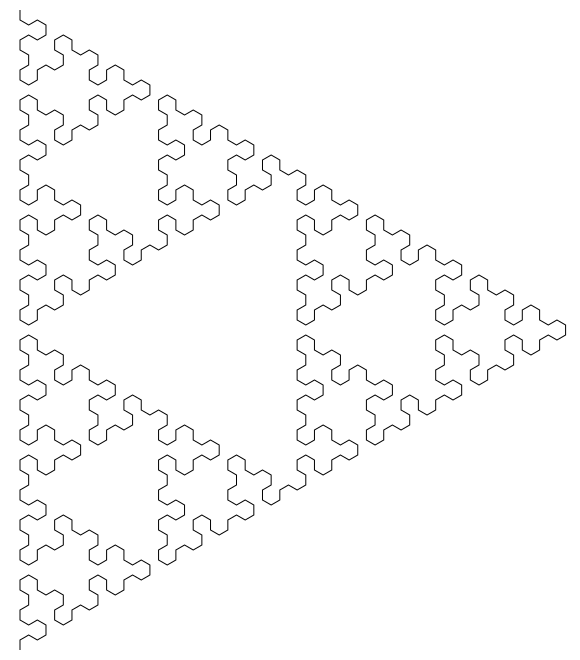

In [7]:
# SVG from path
sSVG = []
sSVG.append('<?xml version="1.0" encoding="UTF-8" standalone="yes"?>')
sSVG.append('<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">')
sSVG.append(f'<svg viewBox="{box[0]} {box[1]} {box[2] - box[0]} {box[3] - box[1]}" height="200mm" width="200mm" style="background-color:#FFF" xmlns="http://www.w3.org/2000/svg" xmlns:svg="http://www.w3.org/2000/svg" version="1.1">')
sSVG.append('<title>L-System Renderer</title>')
sSVG.append('<desc>Generated by L-System.py</desc>')
sSVG.append('<style type="text/css"><![CDATA[')
sSVG.append('.edge {fill:none; stroke:#000000; stroke-width:1}')
sSVG.append(']]></style>')
sSVG.append('<g id="docRoot" style="overflow:hidden;">')
# sSVG.append(f'<circle class="edge" cx="0" cy="0" r="{C_LENGTH / 4}" />') # origin marker
sSVG.append('<path class="edge" d="M0.00000,0.00000')
sSVG.append(''.join(path_curve))
sSVG.append('" />')
sSVG.append('</g>')
sSVG.append('</svg>')
SVG('\n'.join(sSVG))

# file_out = open(C_OUTPUT, 'w')
# file_out.write('\n'.join(sSVG))
# file_out.close()